In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import Landing2DModel
import Landing2DCost
import Landing2DConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [3]:
ix = 6
iu = 2
ih = 9
N = 50
delT = 0.1
max_iter = 20

In [28]:
xi = np.array([2,4,0,0,np.pi/3,0])
xf = np.array([0,0,0,0,0,0])


myModel = Landing2DModel.Landing2D('Hello',ix,iu,delT)
myCost = Landing2DCost.Landing2D('Hello',ix,iu,N)
myConst = Landing2DConstraints.Landing2D('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N+1,iu))
# u0[:,0] = 0
u0[:,1] = 2

In [37]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst,type_discretization="zoh",w_vc=1e4,w_tr=1e-3)
x,u,xbar,ubar,num_iter = i1.update(x0,u0)

iteration   total_cost  cost        ||vc||     ||tr||       reduction   expected    w_tr        bounary
0           0.0001      0.0001      0           0           -0.0161     -0.0161     0.0         0           
1           0.0162      0.000112    6.11e-10    0.0161      0.0154      0.0154      0.0         0           
2           0.000802    0.000134    2.19e-09    0.000667    0.000571    0.00057     0.0         0           
3           0.000232    0.000153    7.57e-09    7.92e-05    7.97e-05    7.85e-05    0.0         1           
SUCCEESS: virtual control and trust region < tol


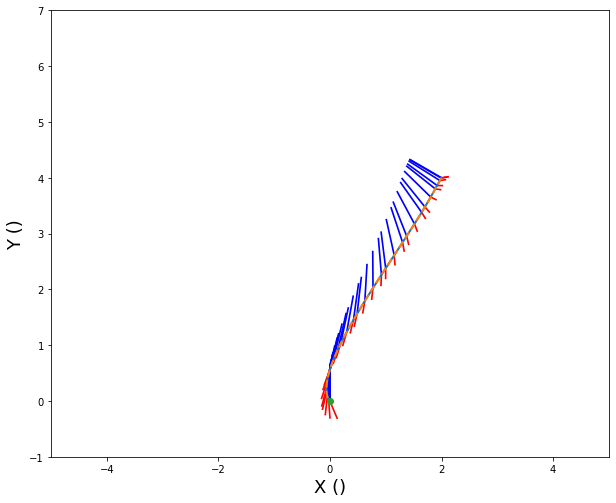

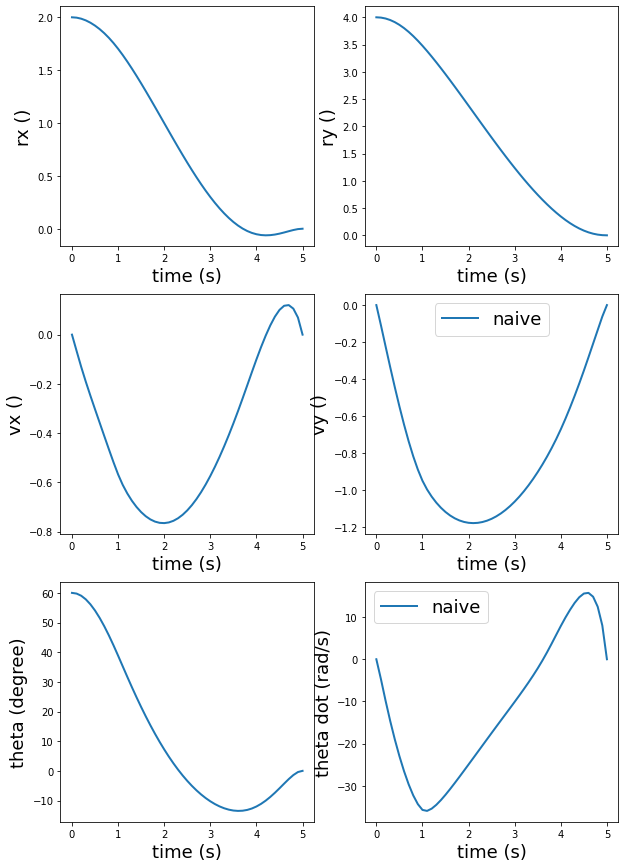

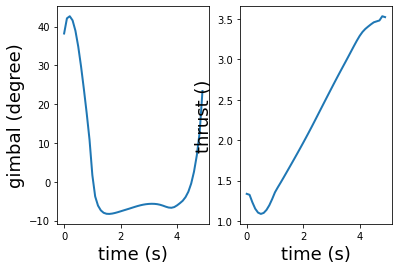

In [34]:
from utils import plot_Landing2D_trajectory
    
plot_Landing2D_trajectory(xbar,ubar,x,delT)


In [ ]:
from utils import make_rocket2d_trajectory_fig
make_rocket2d_trajectory_fig(xbar,ubar,'Landing2D')

In [ ]:
from sympy import sin, cos, Matrix
import sympy as sym

In [ ]:
# X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
# Y = Matrix([rho, phi])

# X.jacobian(Y)

m,g,I,rx,ry,vx,vy,t,w,r_t = sym.symbols('m,g,I,rx,ry,vx,vy,t,w,r_t')
gimbal,thrust = sym.symbols('gimbal,thrust')

f1 = vx
f2 = vy
f3 = 1/m * (-sin(t+gimbal))*thrust
f4 = 1/m * (cos(t+gimbal))*thrust - g
f5 = w
f6 = 1/I * (-sin(gimbal)*thrust*r_t)
f = Matrix([f1,f2,f3,f4,f5,f6])
state = [rx,ry,vx,vy,t,w]
input = [gimbal,thrust]

In [ ]:
f.jacobian(state)

In [ ]:
f.jacobian(input)

In [ ]:
from sympy.tensor.array import derive_by_array

In [ ]:
derive_by_array(f.jacobian(input))